## Setup

In [112]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [113]:
#Loading the train and test data into Pandas Dataframes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [114]:
#Display the first few rows of the train set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
#Display the first few rows of the test set
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [116]:
#the sizes of the train and test datasets before dropping the Id column
print("The size of the train dataset is:{}".format(train.shape))
print("The size of the test dataset is:{}".format(test.shape))

The size of the train dataset is:(1460, 81)
The size of the test dataset is:(1459, 80)


In [117]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size is : {} ".format(train.shape)) 
print("The test data size is : {} ".format(test.shape))


The train data size is : (1460, 80) 
The test data size is : (1459, 79) 


## Data Cleaning

### Outliers

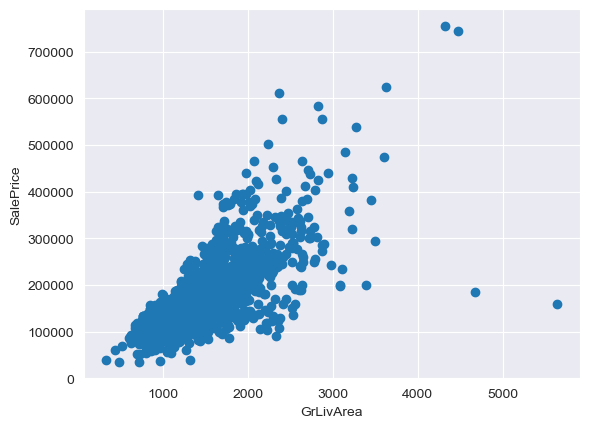

In [118]:
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()


These are the data points with large living areas but relatively low sale prices. These outliers could represent unique cases or data entry errors.

In [119]:
#Dropping outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<350000)].index)

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data.

#### Normality Check for our Target Variable

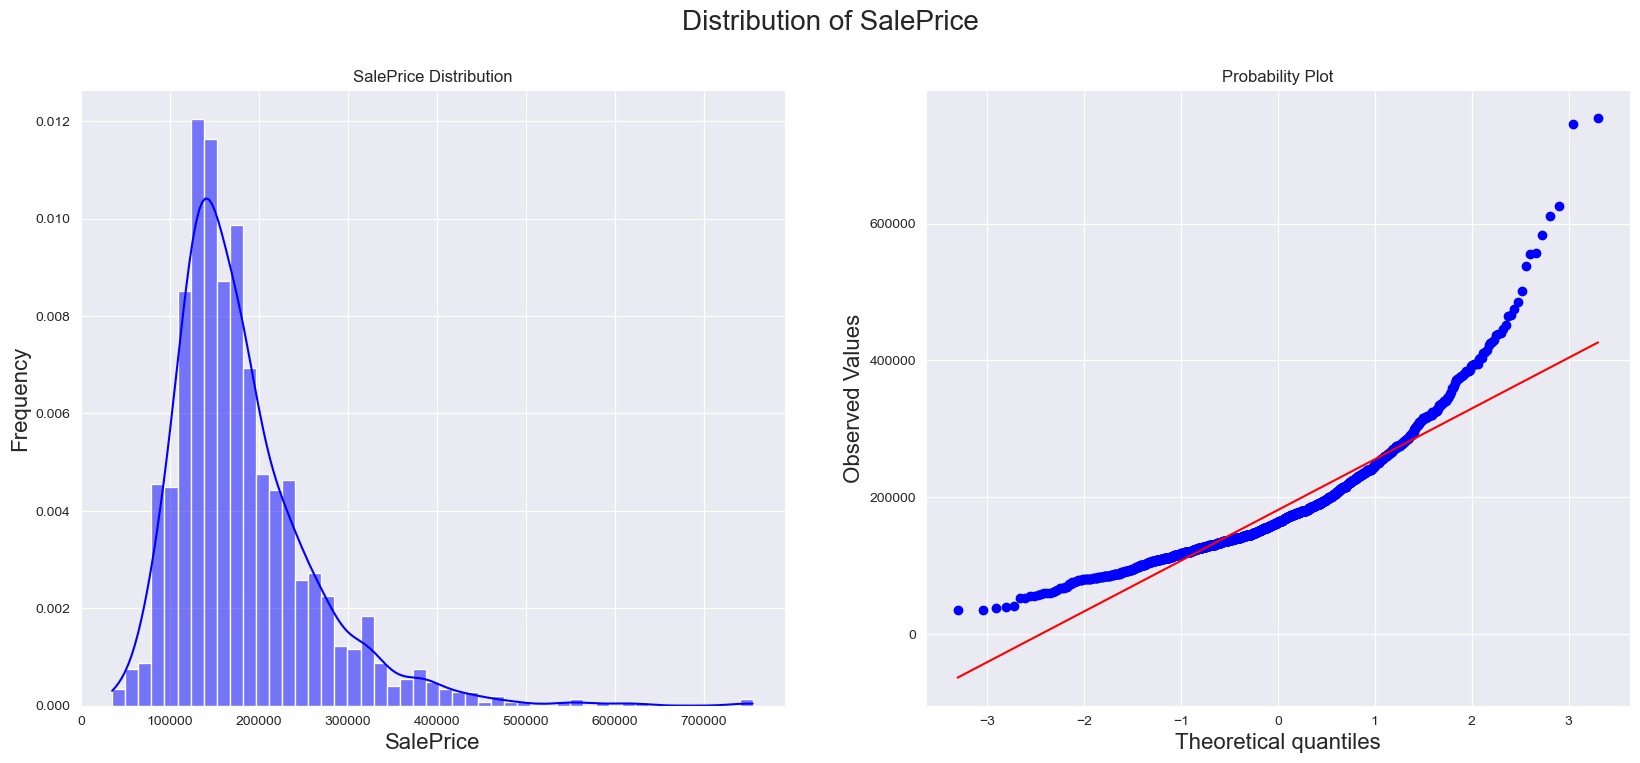

In [120]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# using a histogram
sns.histplot(train["SalePrice"], stat = 'frequency', color = "b", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("SalePrice", fontsize=16)
ax[0].set_title("SalePrice Distribution")

# using a q-q plot 
stats.probplot(train["SalePrice"], plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)


fig.suptitle("Distribution of SalePrice", fontsize=20)

plt.show()

Based on the plots above, it is clear that the 'SalePrice' variable is not normally distributed. It has a right-skewed distribution with a long right tail.

> To address the non-normality, we are going to apply the logarithmic transformation to the 'SalePrice' variable inorder to reduce the skewness of the data and making it closer to a normal distribution.

In [121]:
#logarithmic transformation on 'SalePrice'
train['SalePrice'] = np.log1p(train['SalePrice'])

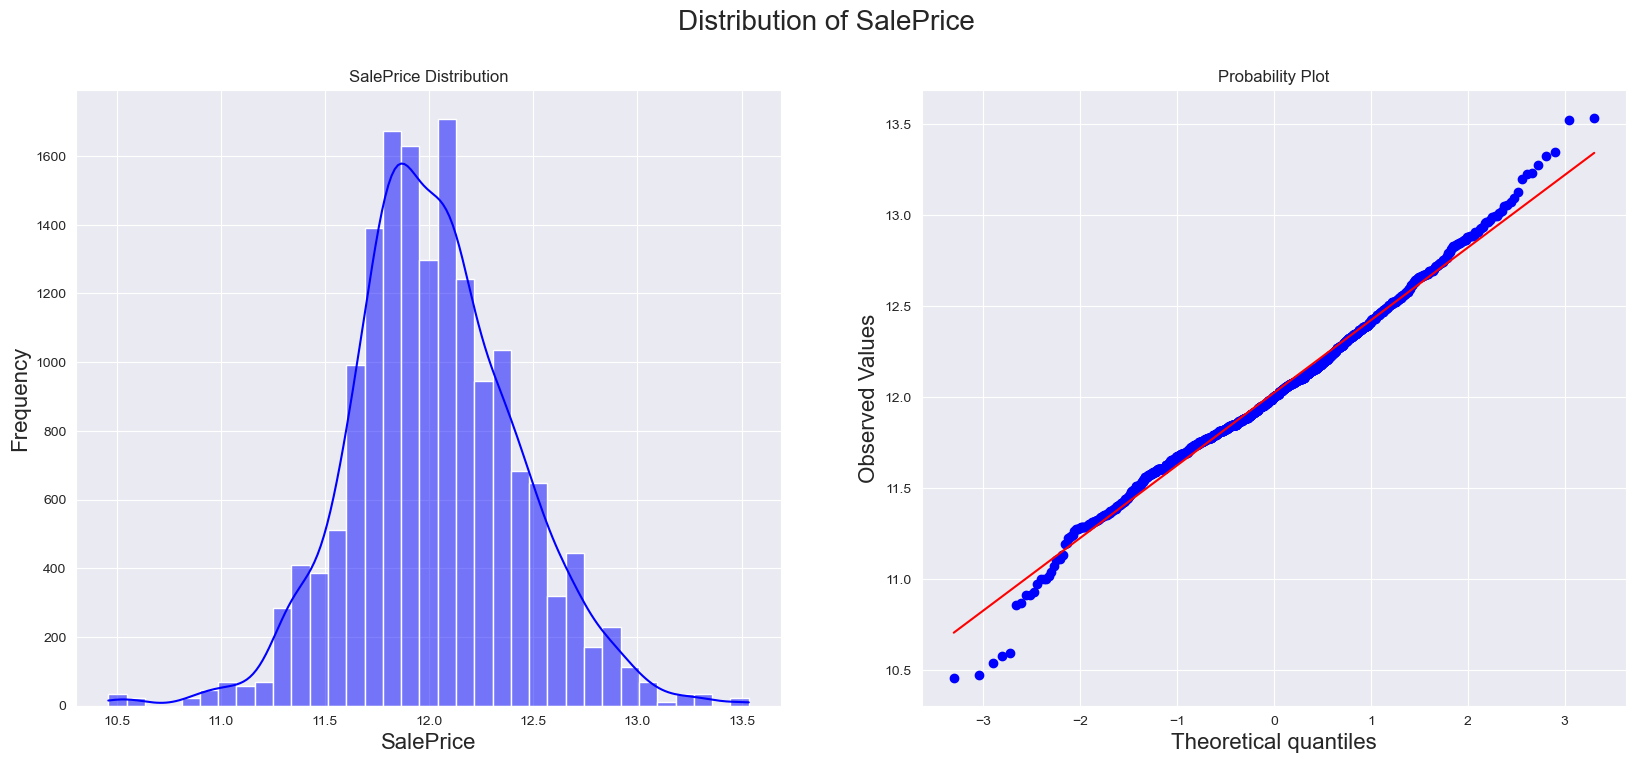

In [122]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# using a histogram
sns.histplot(train["SalePrice"], stat = 'frequency', color = "b", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("SalePrice", fontsize=16)
ax[0].set_title("SalePrice Distribution")

# using a q-q plot 
stats.probplot(train["SalePrice"], plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)


fig.suptitle("Distribution of SalePrice", fontsize=20)

plt.show()

The skew seems now corrected and the data appears more normally distributed.

In [123]:
total_data = pd.concat([train,test], axis=0, sort=False)
total_data = total_data.drop("SalePrice", axis=1)
print("The size of the combined train and test datasets: {}".format(total_data.shape))

The size of the combined train and test datasets: (2917, 79)


### Missing Values

In [124]:
#check for missing values
missing_counts = (total_data.isnull().sum()) / (len(total_data)) * 100

missing_data = missing_counts.drop(missing_counts[missing_counts ==  0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :missing_data})
missing_data

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


> Now let's create a visual representation of the percentage of missing data for each feature in our dataset by using a bar plot

In [125]:
import plotly.express as px

fig = px.bar(missing_data, x = missing_data.index, y = 'Missing Ratio')
fig.update_layout(title='Percentage of Missing Data by Feature', xaxis_title='Features', yaxis_title='Percent Missing')
fig.show()

#### Imputing Missing Values

* PoolQC

In [126]:
total_data["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In the data description, the abbreviation `NA` stands for `No Pool`. This interpretation is reasonable because the vast majority of the houses (over 99%) in the dataset do not have a pool. Therefore, it is expected that most of the entries in the Pool-related columns would be missing.

In [127]:
total_data["PoolQC"].fillna("None", inplace=True)

* Misc Feature

In [128]:
total_data["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In the data description, `NA` which stands for `None` in 'MiscFeature' indicates the absence of any miscellaneous feature.

In [129]:
total_data['MiscFeature'].fillna("None", inplace = True)

* Alley

In [130]:
total_data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In the data description, `NA` which stands for `No alley access` indicates absence of an alley.

In [131]:
total_data["Alley"].fillna("None", inplace=True)

* Fence

In [132]:
total_data["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In the data description, `NA` which stands for `No Fence` indicates absence of a fence.

In [133]:
total_data["Fence"].fillna("None", inplace=True)

* FireplaceQu

In the data description, `NA` which stands for `No FirePlace`

In [134]:
total_data["FireplaceQu"].fillna("None", inplace=True)

* Lot Frontage

To handle missing values in the `LotFrontage` column,we are going to fill missing values with the median `LotFrontage` value of the corresponding neighborhood

In [135]:
total_data["LotFrontage"] = total_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

* GarageType, GarageFinish, GarageQual, and GarageCond

In the data description, `NA` means `No Garage` for all of them.

In [136]:
columns_to_impute = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond']
for col in columns_to_impute:
    total_data[col] = total_data[col].fillna("None", inplace=True)

* GarageYrBuilt, GarageCars and GarageArea

Replacing with 0 (Since No garage = no cars in such garage and it also means no area)

In [137]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)

* BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond, BsmtQual

In the data description, `NA` means `No Basement` for all these categorical basement-related features.

In [138]:
columns_to_impute = ['BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond','BsmtQual']
for col in columns_to_impute:
    total_data[col] = total_data[col].fillna("None", inplace=True)


* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath
 
 Missing values are likely zero for having no basement

In [139]:
columns_to_impute = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in columns_to_impute:
    total_data[col] = total_data[col].fillna(0)


* MasVnrArea and MasVnrType

`NA` most likely means no masonry veneer. We can fill `0` for the area and `None` for the type.

In [140]:
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna(0)
total_data["MasVnrType"] = total_data["MasVnrType"].fillna("None")

* Electrical 

It has one `NA` value. Since this feature has mostly `SBrkr`, we can set that for the missing value.

In [141]:
total_data["Electrical"] = total_data["Electrical"].fillna(total_data["Electrical"].mode()[0])

* Functional

In data description says `NA` means `typical`

In [142]:
total_data["Functional"] = total_data["Functional"].fillna("typical", inplace=True)

* MSZoning

In [143]:
total_data["MSZoning"].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [144]:
total_data["MSZoning"] = total_data["MSZoning"].fillna(total_data["MSZoning"].mode()[0])

* KitchenQual

In the data description , there are five categories for kitchen quality :  `Ex` for `Excellent`, `Gd` for`Good`, TA for `Typical/Average`,  `Fa` for `Fair`, `Po` for `Poor`. We are going to fill in the missing values with the most common value.

In [145]:
total_data["KitchenQual"] = total_data["KitchenQual"].fillna(total_data["KitchenQual"].mode()[0])

* Exterior2nd and Exterior1st
 
 Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common value.

In [146]:
total_data["Exterior2nd"] = total_data["Exterior2nd"].fillna(total_data["Exterior2nd"].mode()[0])
total_data["Exterior1st"] = total_data["Exterior1st"].fillna(total_data["Exterior1st"].mode()[0])

* Utilities
For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, we can drop this feature.

In [147]:
total_data = total_data.drop(["Utilities"], axis = 1)

* Sale Type

In the data description, it has 10 categories, so we are going to fill missing values with the most common category.

In [148]:
total_data["SaleType"] = total_data["SaleType"].fillna(total_data["SaleType"].mode()[0])

In [150]:
#check for remaining missing values if any
total_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 78, dtype: int64

## Feature Engineering